## Import libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import ResNet50, VGG16
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [4]:
# Classes of trafic signs
classes = { 0:'Speed limit (15km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'No entry', 
            7:'No Free Left', 
            8:'No Free Right', 
            9: 'No Free U turn',
            10:'Horn Prohibited',
            11:'Free left', 
            12:'Free right', 
            13:'Free U turn', 
            14:'General Caution',
            15:'Zibra Crossing', 
            16:'School zone', 
            17:'Dangerous curve right', 
            18:'Dangerous curve left',
            19:'Right Turn ahead',
            20:'Left Turn ahead', 
            }

In [34]:
os.chdir('D:/ML_Lab/Project/train')
classes = 21 #21 traffic signs
cur_path = os.getcwd()
cur_path

'D:\\ML_Lab\\Project\\train'

## Preprocess the images

In [35]:
def load_images_to_data(image_label, image_directory, features_data, label_data):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        full_path = image_directory
        image_file_name = os.path.join(full_path, file)
        if ".png" in image_file_name:
            img = Image.open(image_file_name)
            img = img.resize((32,32))
            im2arr = img_to_array(img)
            im2arr = im2arr[:,:,0]
            im2arr = im2arr.reshape(1,32,32)
            features_data.append(im2arr) 
            label_data.append(image_label)
    return features_data, label_data

In [36]:
data = []
label = []
for path in os.listdir(cur_path):
    full_path = os.path.join(cur_path, path)
    data, label = load_images_to_data(
        path, full_path, data, label)

## Converting lists into numpy arrays

In [37]:
labels = np.array(label)
data = np.array(data )

## Store data for future use

In [38]:
os.chdir('D:/ML_Lab/Project/')
cur_path = os.getcwd()
np.save(cur_path + '\\training\\data.npy',data)
np.save(cur_path + '\\training\\target.npy',labels)
cur_path

'D:\\ML_Lab\\Project'

In [39]:
os.chdir('D:/ML_Lab/Project')
cur_path = os.getcwd()

## Load data & Labels

In [40]:
data=np.load(cur_path +'\\training\\data.npy')
labels=np.load(cur_path + '\\training\\target.npy')

In [41]:
print(cur_path + '\\training\\target.npy')

D:\ML_Lab\Project\training\target.npy


In [9]:
print(data.shape, labels.shape)

(32356, 1, 32, 32) (32356,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25884, 1, 32, 32) (6472, 1, 32, 32) (25884,) (6472,)


## Convert labels to onehot encoding

In [43]:
y_train = to_categorical(y_train, 21)
y_test = to_categorical(y_test, 21)

# Build the Models

In [44]:
# Using 10 epochs to train each model
epochs = 200

### Simple CNN Model

In [45]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same'))
model1.add(MaxPool2D((2, 2), padding='same'))
model1.add(Dropout(rate=0.25))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPool2D((2, 2), padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPool2D((2, 2), padding='same'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(21, activation='softmax'))

In [46]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/200
678/678 [==============================] - 11s 13ms/step - loss: 1.5140 - accuracy: 0.5653 - val_loss: 0.5639 - val_accuracy: 0.8351
Epoch 2/200
678/678 [==============================] - 8s 12ms/step - loss: 0.6067 - accuracy: 0.8096 - val_loss: 0.1739 - val_accuracy: 0.9552
Epoch 3/200
678/678 [==============================] - 9s 13ms/step - loss: 0.3759 - accuracy: 0.8850 - val_loss: 0.1371 - val_accuracy: 0.9686
Epoch 4/200
678/678 [==============================] - 9s 13ms/step - loss: 0.2790 - accuracy: 0.9158 - val_loss: 0.0696 - val_accuracy: 0.9827
Epoch 5/200
678/678 [==============================] - 9s 13ms/step - loss: 0.2400 - accuracy: 0.9280 - val_loss: 0.1024 - val_accuracy: 0.9677
Epoch 6/200
678/678 [==============================] - 9s 13ms/step - loss: 0.2207 - accuracy: 0.9380 - val_loss: 0.0584 - val_accuracy: 0.9858
Epoch 7/200
678/678 [==============================] - 9s 13ms/step - loss: 0.1975 - accuracy: 0.9427 - val_loss: 0.0436 - val_accuracy

### ResNet50 Model

In [25]:
X_train_reshaped32 = np.squeeze(X_train, axis=1)
X_train_resized = np.expand_dims(X_train_reshaped32, axis = -1)
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)
input_shape = X_train_resized.shape[1:]

X_test_reshaped32 = np.squeeze(X_test, axis=1)
X_test_resized = np.expand_dims(X_test_reshaped32, axis = -1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#Freezing all the layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(21, activation='softmax')(x)
model2 = Model(inputs=base_model.input, outputs=predictions)

In [26]:

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(X_train_resized, y_train,
                     epochs=5,
                     batch_size=32,
                     validation_data=(X_test_resized, y_test))

print("Traning after Unfreezing")
#Unfreezing for fine tuning
for layer in model2.layers[-10:]:
    layer.trainable = True

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(X_train_resized, y_train,
                     epochs=5,
                     batch_size=32,
                     validation_data=(X_test_resized, y_test))

Epoch 1/5
809/809 [==============================] - 170s 204ms/step - loss: 0.4581 - accuracy: 0.8683 - val_loss: 0.1886 - val_accuracy: 0.9390
Epoch 2/5
809/809 [==============================] - 196s 243ms/step - loss: 0.1448 - accuracy: 0.9529 - val_loss: 0.1597 - val_accuracy: 0.9493
Epoch 3/5
809/809 [==============================] - 220s 272ms/step - loss: 0.1109 - accuracy: 0.9638 - val_loss: 0.2950 - val_accuracy: 0.9192
Epoch 4/5
809/809 [==============================] - 242s 300ms/step - loss: 0.0952 - accuracy: 0.9723 - val_loss: 0.2214 - val_accuracy: 0.9351
Epoch 5/5
809/809 [==============================] - 263s 326ms/step - loss: 0.0751 - accuracy: 0.9763 - val_loss: 0.0944 - val_accuracy: 0.9705
Epoch 1/5
809/809 [==============================] - 339s 408ms/step - loss: 0.1516 - accuracy: 0.9630 - val_loss: 0.1117 - val_accuracy: 0.9686
Epoch 2/5
809/809 [==============================] - 292s 361ms/step - loss: 0.0731 - accuracy: 0.9814 - val_loss: 0.0609 - val_ac

### Customized VGG16 Model

In [27]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(21, activation='softmax')(x)
model3 = Model(inputs=base_model.input, outputs=predictions)


In [28]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(X_train_resized, y_train,
                     epochs=5,
                     batch_size=32,
                     validation_data=(X_test_resized, y_test))

#Unfreezing for fine tuning
for layer in model3.layers[-4:]:
    layer.trainable = True

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(X_train_resized, y_train,
                     epochs=5,
                     batch_size=32,
                     validation_data=(X_test_resized, y_test))

Epoch 1/5
809/809 [==============================] - 227s 275ms/step - loss: 1.7706 - accuracy: 0.7826 - val_loss: 0.2255 - val_accuracy: 0.9329
Epoch 2/5
809/809 [==============================] - 189s 233ms/step - loss: 0.3283 - accuracy: 0.8987 - val_loss: 0.1550 - val_accuracy: 0.9425
Epoch 3/5
809/809 [==============================] - 167s 207ms/step - loss: 0.2870 - accuracy: 0.9103 - val_loss: 0.1463 - val_accuracy: 0.9479
Epoch 4/5
809/809 [==============================] - 181s 224ms/step - loss: 0.2934 - accuracy: 0.9133 - val_loss: 0.1662 - val_accuracy: 0.9424
Epoch 5/5
809/809 [==============================] - 211s 260ms/step - loss: 0.2541 - accuracy: 0.9214 - val_loss: 0.1205 - val_accuracy: 0.9604
Epoch 1/5
809/809 [==============================] - 216s 264ms/step - loss: 0.3108 - accuracy: 0.9198 - val_loss: 0.1295 - val_accuracy: 0.9594
Epoch 2/5
809/809 [==============================] - 212s 262ms/step - loss: 0.2708 - accuracy: 0.9291 - val_loss: 0.0838 - val_ac

## Metrics

In [ ]:
# Simple CNN Model 
plt.figure(0, figsize=(4.0, 4.0))
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['loss'], label='Loss')
plt.title('Simple CNN model')
plt.xlabel('epochs')
plt.ylabel('accuracy & loss')
plt.legend()
plt.show()

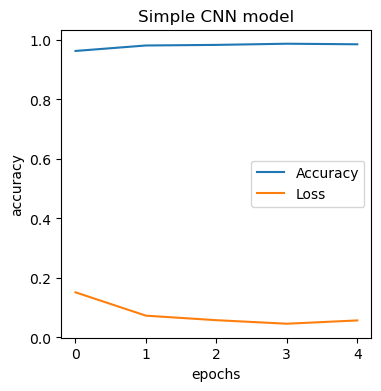

In [29]:
# ResNet50 Model 
plt.figure(0, figsize=(4.0, 4.0))
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['loss'], label='Loss')
plt.title('Simple CNN model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

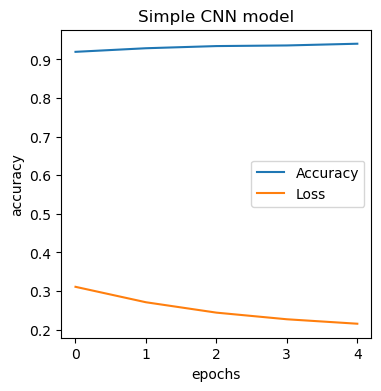

In [30]:
# Customized VGG16 Model 
plt.figure(0, figsize=(4.0, 4.0))
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['loss'], label='Loss')
plt.title('Simple CNN model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Testing

In [52]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((32,32))
        im2arr = img_to_array(image)
        im2arr = im2arr[:,:,0]
        im2arr = im2arr.reshape(1,32,32)
        data.append(np.array(im2arr))
    X_test=np.array(data)
    return X_test,label

In [59]:
X_test, label = testing('Test.csv')

(1004,)

In [71]:
y_test1 = model1.predict(X_test)

X_test_reshaped32 = np.squeeze(X_test, axis=1)
X_test_resized = np.expand_dims(X_test_reshaped32, axis = -1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

y_test2 = model2.predict(X_test_resized)
y_test3 = model3.predict(X_test_resized)


32/32 [==============================] - 3s 94ms/step


## Save the model

In [70]:
model1.save("./training/model1.h5")
model2.save("./training/model2.h5")
model3.save("./training/model3.h5")

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Model

In [5]:
from keras.models import load_model

model1 = load_model("./training/model1.h5")
model2 = load_model("./training/model2.h5")
model3 = load_model("./training/model3.h5")


In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def final_test(img):
    data=[]
    image = Image.open(img)
    image = image.resize((32,32))
    im2arr = img_to_array(image)
    im2arr = im2arr[:,:,0]
    im2arr = im2arr.reshape(1,32,32)
    data.append(np.array(im2arr))
    X_test=np.array(data)
    Y_pred = model1.predict(X_test)
    classes_x=np.argmax(Y_pred,axis=1)
    return image,classes_x

1/1 [==============================] - 0s 25ms/step
Predicted traffic sign is:  Free left


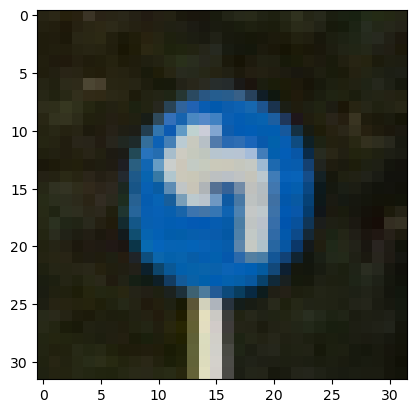

1/1 [==============================] - 0s 25ms/step
Predicted traffic sign is:  Free U turn


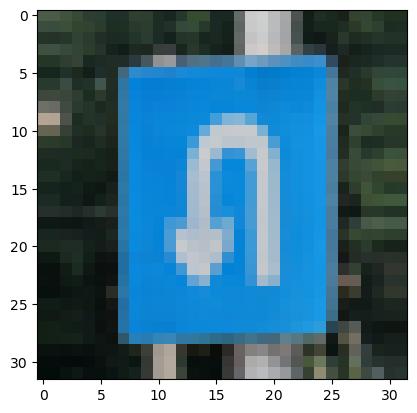

1/1 [==============================] - 0s 22ms/step
Predicted traffic sign is:  General Caution


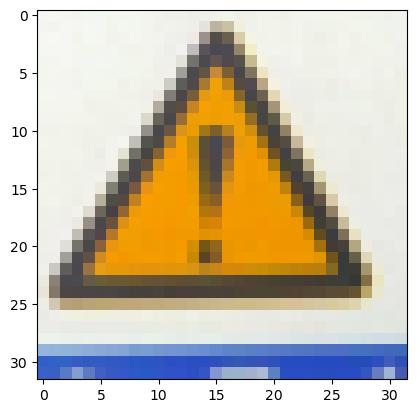

In [10]:
from pathlib import Path
rootdir = 'D:/ML_Lab/Project/Validate'
images = Path(rootdir).glob('*.png')
for image in images:
    plot,prediction = final_test(image)
    s = [str(i) for i in prediction]
    a = int("".join(s)) 
    print("Predicted traffic sign is: ", classes[a])
    plt.imshow(plot)
    plt.show()